# <center><B>AIRBNB</center>


1. [Importing Libraries](#importing-libraries)
2. [Loading the Dataset](#loading-the-dataset)
3. [Dataset Overview](#dataset-overview)
4. [Data Info](#data-info)
5. [Data Cleaning](#data-cleaning)
    - [Eliminating Duplicates](#eliminating-duplicates)
    - [Checking for Null Values in Each Column](#checking-for-null-values-in-each-column)
    - [Dropping Unnecessary Columns](#dropping-unnecessary-columns)
    - [Examining Continuous Variables](#examining-continuous-variables)
6. [Print All Columns](#print-all-columns)
7. [Theme Setting](#theme-setting)
8. [Data Visualization: Using Plots to Find Relationships Between Features](#data-visualization)
    - [Reviews Per Month](#reviews-per-month)
    - [Plot All Types of Room](#plot-all-types-of-room)
    - [Relationship Between Room Type and Availability of Room](#relationship-between-room-type-and-availability-of-room)
    - [Cancellation Policy and Price](#cancellation-policy-and-price)
    - [Map of Service Fees](#map-of-service-fees)
    - [Impact of Number of Reviews on Price](#impact-of-number-of-reviews-on-price)
    - [Frequency Distribution and Density of Number of Reviews](#frequency-distribution-and-density-of-number-of-reviews)
    - [Relationship Between Room Type and Service Fee](#relationship-between-room-type-and-service-fee)
    - [Geographic Distribution of Listings by Availability](#geographic-distribution-of-listings-by-availability)
    - [Distribution of Prices Across Listings](#distribution-of-prices-across-listings)
    - [Number of Listings by Neighbourhood Group](#number-of-listings-by-neighbourhood-group)
    - [Average Days of Availability Across Neighbourhood Groups](#average-days-of-availability-across-neighbourhood-groups)
    - [Location of Listings Across Neighborhood Groups](#location-of-listings-across-neighborhood-groups)
    - [Spatial Spread of Room Types Across Locations](#spatial-spread-of-room-types-across-locations)


<br>

 ## <b><a name="importing-libraries"></a>Importing Libraries 




 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import MarkerCluster
import webbrowser


<br>

## <b><a name="loading-the-dataset"></a>Loading the Dataset


In [3]:
file_path = "Airbnb_Open_Data new.csv"  # Update with your file path
df = pd.read_csv("C:\\Users\\DELL8\\OneDrive\\Pictures\\Airbnb_Open_Data new.csv",dtype={25: str})

<br>

## <b><a name="dataset-overview"></a>Dataset Overview


In [4]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


<br>

## <B><a name="data-info"></a>Data Info


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

<br>

 ## <b><a name="data-cleaning"></a>Data Cleaning

<br>

#### <a name="eliminating-duplicates"></a>Eliminating Duplicates

In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

<br>

#### <a name="checking-for-null-values-in-each-column"></a>Checking for Null Values in Each Column





In [7]:
df.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            404
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       400
number of reviews                    183
last review                        15832
reviews per month                  15818
review rate number                   319
calculated host listings count       319
availability 365                     448
house_rules     

In [8]:
df['price'] = pd.to_numeric(df['price'].replace('[\$,]', '', regex=True), errors='coerce')
df['service fee'] = pd.to_numeric(df['service fee'].replace('[\$,]', '', regex=True), errors='coerce')

<br>

#### <a name="dropping-unnecessary-columns"></a>Dropping Unnecessary

In [9]:
columns_to_drop = ['license', 'house_rules', 'last review', 'id', 'host id', 'NAME', 'host name']
df_cleaned = df.drop(columns=columns_to_drop, axis=1)



In [10]:
df_cleaned['reviews per month'].fillna(0, inplace=True)
df_cleaned['host_identity_verified'].fillna('Unknown', inplace=True)
df_cleaned['neighbourhood group'].fillna('Unknown', inplace=True)

<br>

#### <a name="examining-continuous-variables"></a>Examining Continuous Variables

In [11]:
df.describe()

,id,host id,lat,long,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.020580e+05,1.020580e+05,102050.000000,102050.000000,101844.000000,101811.000000,101785.000000,101658.000000,101875.000000,86240.000000,101739.000000,101739.000000,101610.000000
mean,2.918438e+07,4.926738e+10,40.728097,-73.949652,2012.488090,625.355580,125.039249,8.126640,27.517948,1.375408,3.278733,7.936937,141.043992
std,1.627173e+07,2.853742e+10,0.055852,0.049502,5.765838,331.672649,66.325905,30.616698,49.571744,1.748019,1.285089,32.266355,135.429156
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.509286e+07,2.459924e+10,40.688730,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.918438e+07,4.912865e+10,40.722290,-73.954440,2012.000000,625.000000,125.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.327590e+07,7.400619e+10,40.762760,-73.932350,2017.000000,913.000000,183.000000,5.000000,31.000000,2.010000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


<br>

#### <a name="print-all-columns"></a>Print All Columns 


In [12]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

<br>

#### <a name="theme-setting"></a>Theme Setting

In [13]:
sns.set_theme(style="whitegrid")

<br>

### <a name="data-visualization"></a>Data Visualization

<br>
1. <a name="reviews-per-month"></a>Reviews Per Month


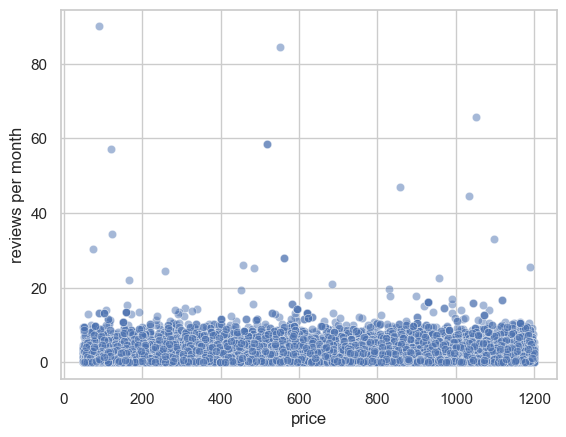

In [14]:
sns.scatterplot(data=df, x="price", y="reviews per month", alpha=0.5, palette="viridis")
plt.show()

<B>Observation:<br>

The scatterplot shows that the majority of listings with higher reviews per month are concentrated in the lower to mid-price range, while expensive listings tend to have fewer reviews per month.

<b>Conclusion:<br>

There is an inverse relationship between price and review activity: more affordable listings attract higher customer engagement, whereas premium-priced listings are less frequently reviewed.


<br>
<a name="plot-all-types-of-room"></a>Plot All Types of Room 

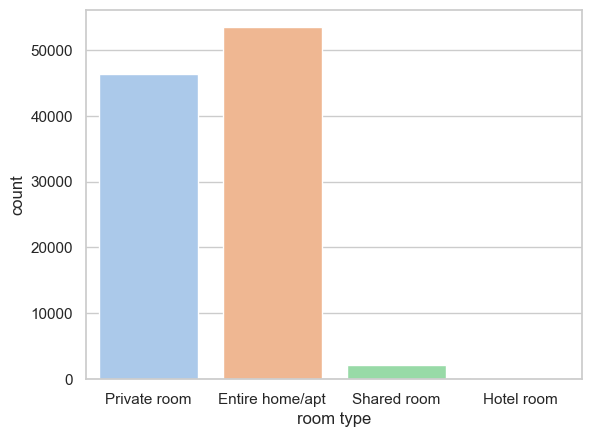

In [15]:
sns.countplot(data=df, x="room type", palette="pastel")
plt.show()

<B>Observation:<br>

The countplot reveals that certain room types, such as "Entire home/apt," are significantly more common, while others, like "Shared room," are much less frequent.

<b>Conclusion:<br>

"Entire home/apt" is the most popular room type, indicating a preference among users for complete privacy, while "Shared room" is the least preferred, likely due to its shared nature and limited privacy.

<br>
<a name="relationship-between-room-type-and-availability-of-room"></a>Relationship Between Room Type and Availability of Room

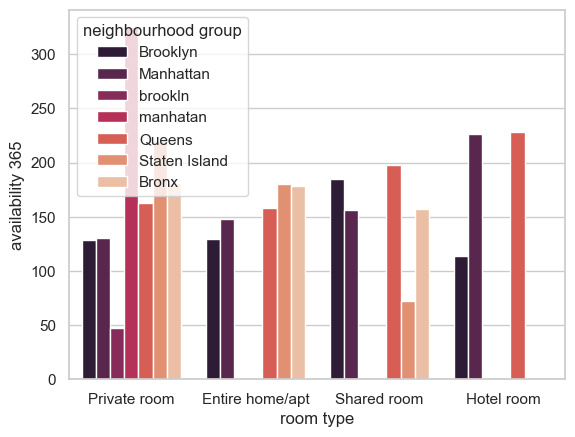

In [16]:
sns.barplot(data=df, x="room type", y="availability 365", estimator="mean", ci=None, palette="rocket",hue="neighbourhood group")
plt.show()

<B>Observation:<br>

The barplot shows that the average availability of room types varies significantly across different neighborhood groups. For example, "Entire home/apt" may have higher availability in some neighborhoods, while "Shared room" might have the lowest availability overall.

<b>Conclusion:<br>

The availability of room types is influenced by the neighborhood group. Some room types, like "Entire home/apt," are more consistently available throughout the year in specific neighborhoods, indicating demand patterns linked to location and room type preferences

<br>
<a name="cancellation-policy-and-price"></a>Cancellation Policy and Price

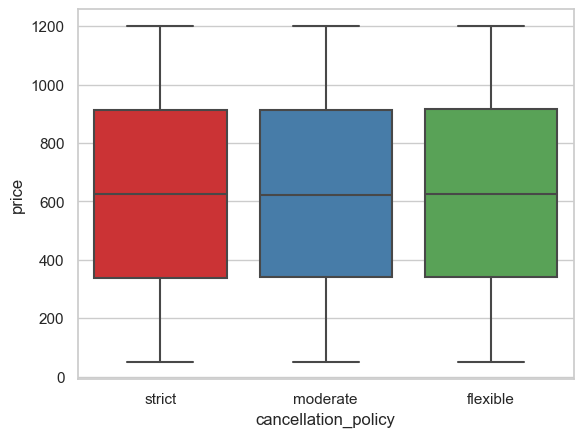

In [17]:
sns.boxplot(data=df, x="cancellation_policy", y="price", palette="Set1")
plt.show()

<B>Observation:<br>

The boxplot reveals that listings with more flexible cancellation policies tend to have lower median prices, while stricter cancellation policies are associated with higher-priced listings. Additionally, strict policies often exhibit greater price variability

<b>Conclusion:<br>

Stricter cancellation policies are typically linked to higher-priced listings, likely reflecting the premium nature of such offerings, while flexible policies are more common among lower-priced, budget-friendly listings.

<br>
 <a name="map-of-service-fees"></a>Map of Service Fees

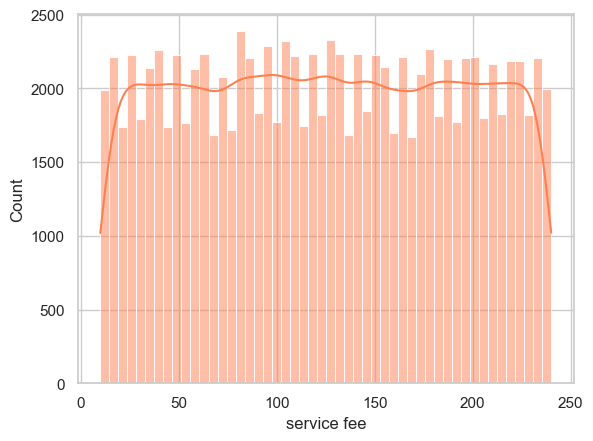

In [18]:
sns.histplot(data=df, x="service fee", bins=50, kde=True, color="coral")
plt.show()

<B>Observation:<br>

The histogram shows that the majority of service fees are concentrated at the lower end of the scale, with a steep drop-off as the fees increase. The distribution is positively skewed, and the KDE curve highlights a smooth decline after the peak.

<b>Conclusion:<br>

Most listings have a low service fee, indicating affordability for users, while higher service fees are less common, likely catering to premium or high-value listings.

<br>
<a name="impact-of-number-of-reviews-on-price"></a>Impact of Number of Reviews on Price

<Axes: xlabel='number of reviews', ylabel='price'>

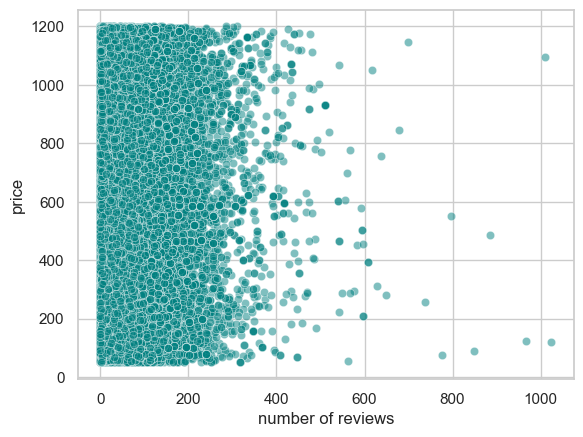

In [19]:
sns.scatterplot(data=df, x="number of reviews", y="price", alpha=0.5, color="teal")

<B>Observation:<br>

The scatterplot indicates that listings with a higher number of reviews tend to have lower prices, while listings with higher prices generally receive fewer reviews. A dense cluster of points appears in the low-price and high-review range

<b>Conclusion:<br>

Affordable listings attract more reviews, suggesting they are more popular among users, while expensive listings are reviewed less frequently, potentially due to limited accessibility or niche appeal

<br>
 <a name="frequency-distribution-and-density-of-number-of-reviews"></a>Frequency Distribution and Density of Number of Reviews

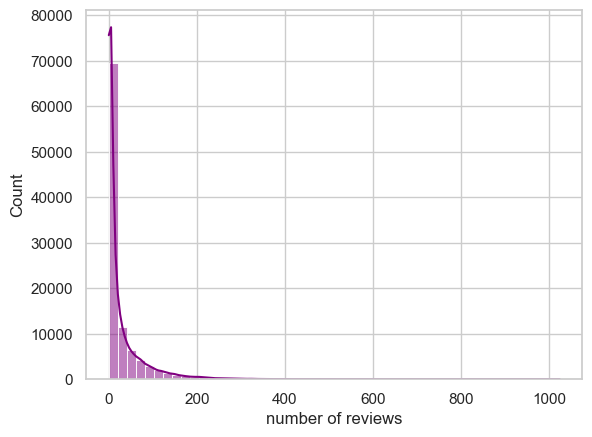

In [20]:
sns.histplot(data=df, x="number of reviews", bins=50, kde=True, color="purple")
plt.show()

<B>Observation:<br>

The histogram shows that the majority of listings have a low number of reviews, with the frequency sharply declining as the number of reviews increases. The KDE curve further highlights this skewed distribution, with a long tail extending towards higher review counts

<b>Conclusion:<br>

Most listings receive only a small number of reviews, indicating limited user interaction for the majority of properties, while a few popular listings garner significantly higher review counts, reflecting their popularity or frequent bookings.

<br>
<a name="relationship-between-room-type-and-service-fee"></a>Relationship Between Room Type and Service Fee

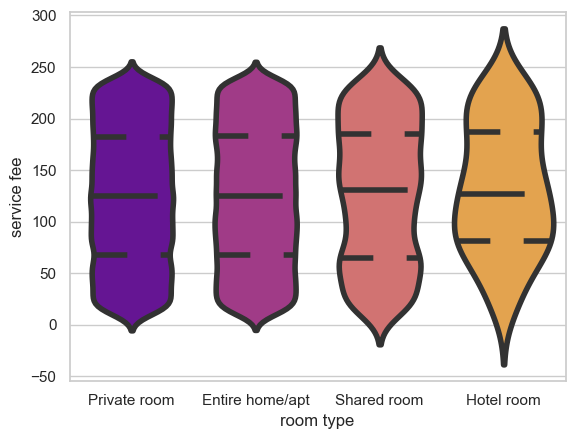

In [21]:
sns.violinplot(x="room type", y="service fee", data=df, palette="plasma", inner="quartile",linewidth=4)
plt.show()

<B>Observation:<br>

The violin plot shows that the distribution of service fees varies by room type. "Entire home/apt" generally has the highest median service fee and a broader range, while "Shared room" has the lowest service fees with a narrower distribution. Quartile lines indicate where most values are concentrated within each room type.

<b>Conclusion:<br>

Service fees are highest for "Entire home/apt" due to its premium nature, while "Shared room" has the lowest fees, reflecting its budget-friendly appeal. This suggests that service fees are proportional to the exclusivity and privacy offered by the room type.

<br>
  <a name="geographic-distribution-of-listings-by-availability"></a>Geographic Distribution of Listings by Availability

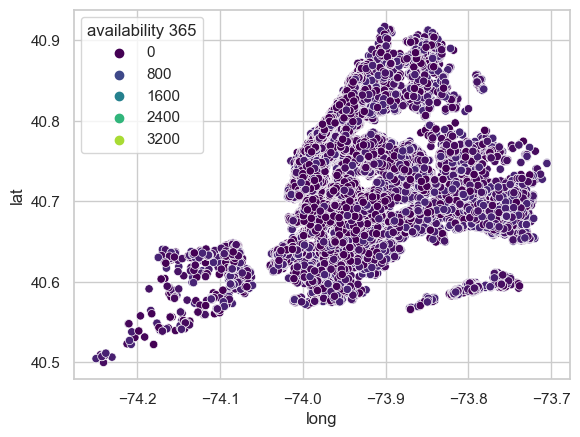

In [22]:
sns.scatterplot(x=df['long'], y=df['lat'], hue=df['availability 365'],palette="viridis")
plt.show()

<B>Observation:<br>

The scatterplot shows the geographic distribution of listings based on longitude and latitude, with the color indicating the availability (number of days available per year). Areas with more vibrant colors (indicating higher availability) are clustered in certain regions, while areas with lower availability (fainter colors) are scattered more evenly.

<b>Conclusion:<br>

Listings with higher availability are concentrated in specific areas, suggesting that certain regions have more properties that are consistently available throughout the year. In contrast, areas with lower availability may indicate more seasonal or niche listings.

<br>
  <a name="distribution-of-prices-across-listings"></a>Distribution of Prices Across Listings

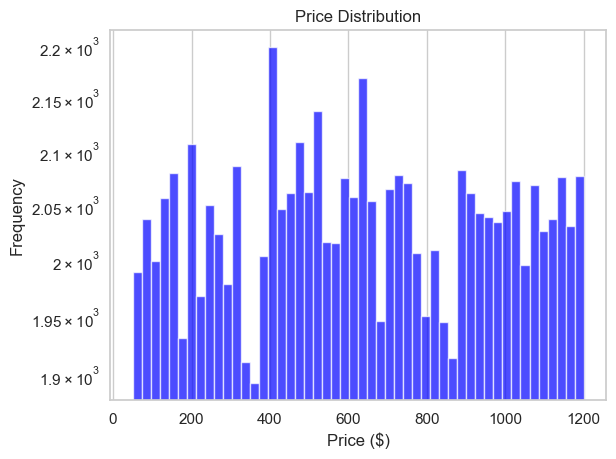

In [23]:
plt.hist(df['price'], bins=50, color='blue', alpha=0.7)
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.yscale('log')  # Optional log scale
plt.show()

<B>Observation:<br>

The price distribution is heavily skewed, with most listings priced low and fewer high-priced listings, visible through the log scale.

<b>Conclusion:<br>

Most listings are affordable, while high-priced listings are rare

<br>
   <a name="number-of-listings-by-neighbourhood-group"></a>Number of Listings by Neighbourhood Group

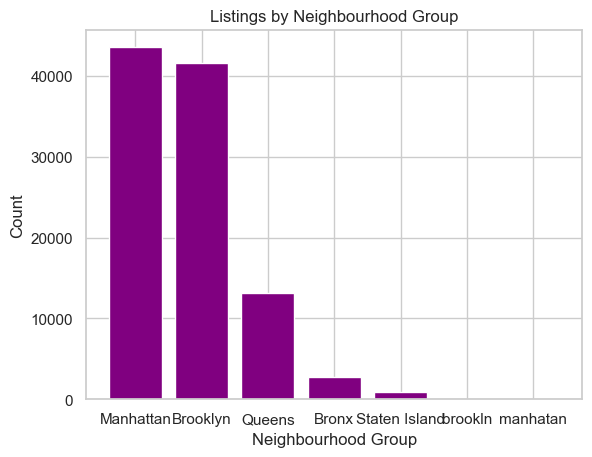

In [24]:
neighbourhood_group_counts = df['neighbourhood group'].value_counts()
plt.bar(neighbourhood_group_counts.index, neighbourhood_group_counts.values, color='purple')
plt.title("Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.show()

<B>Observation:<br>

The bar chart shows the number of listings in each neighborhood group, with certain groups having a significantly higher count of listings than others

<b>Conclusion:<br>

Some neighborhood groups have a much higher number of listings, indicating higher demand or more available properties in those areas, while other groups have fewer listings, suggesting either lower demand or less availability.

<br>
<a name="average-days-of-availability-across-neighbourhood-groups"></a>Average Days of Availability Across Neighbourhood Groups

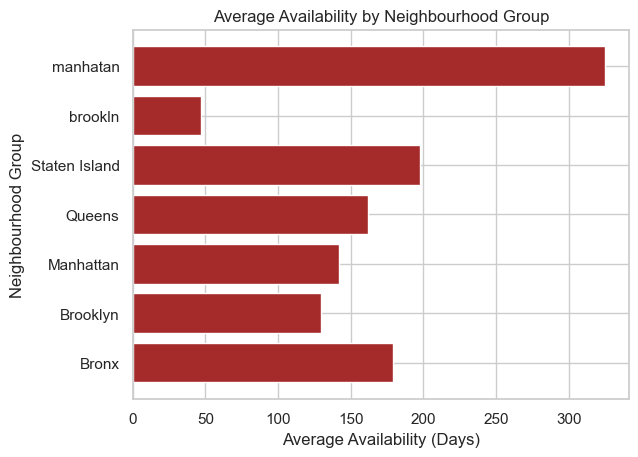

In [25]:
avg_availability = df.groupby("neighbourhood group")['availability 365'].mean()
plt.barh(avg_availability.index, avg_availability.values, color='brown')
plt.title("Average Availability by Neighbourhood Group")
plt.xlabel("Average Availability (Days)")
plt.ylabel("Neighbourhood Group")
plt.show()

<B>Observation:<br>

The horizontal bar chart shows the average availability of listings across different neighborhood groups, with some groups having significantly higher average availability than others.

<b>Conclusion:<br>

Certain neighborhood groups have listings that are available more frequently throughout the year, while others have lower average availability, indicating differences in demand or property usage.

<a name="location-of-listings-across-neighborhood-groups"></a>Location of Listings Across Neighborhood Groups

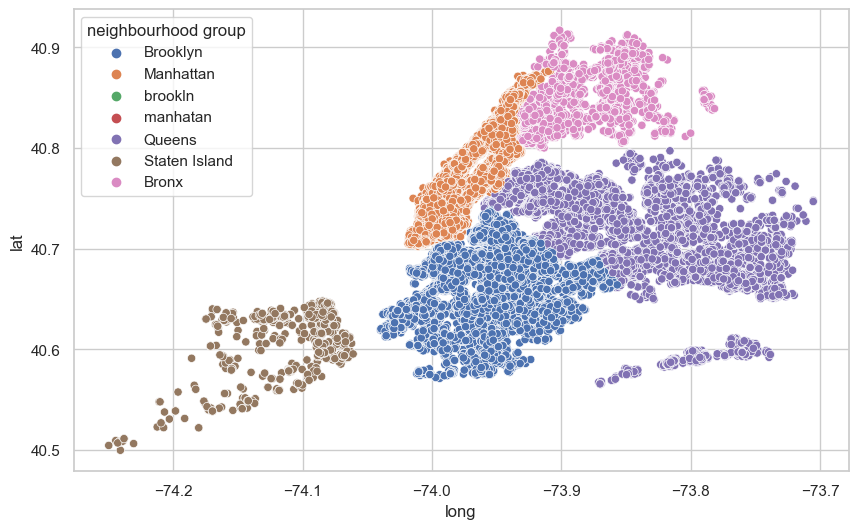

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', hue='neighbourhood group', data=df)
plt.show()

<B>Observation:<br>

The scatterplot reveals geographic clustering of listings, with some neighborhood groups having higher concentrations.

<b>Conclusion:<br>

This indicates that certain areas are more densely populated with properties, reflecting higher demand in those regions

<br>
<a name="spatial-spread-of-room-types-across-locations"></a>Spatial Spread of Room Types Across Locations


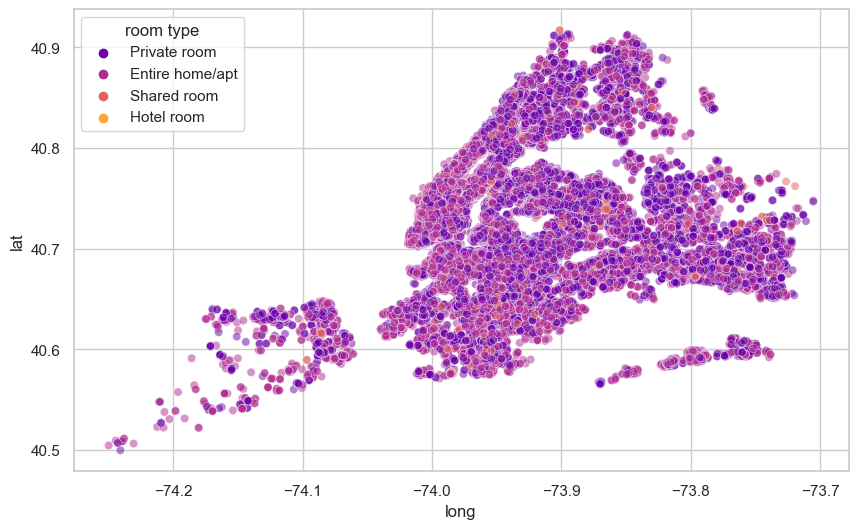

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='long', y='lat', hue='room type', data=df,palette="plasma",alpha=0.5)
plt.show()


<B>Observation:<br>

The scatterplot illustrates the geographic spread of df listings, with room types differentiated by color. Certain regions show clear clusters for specific room types, indicating location-based preferences

<b>Conclusion:<br>

Different room types are unevenly distributed across locations, suggesting that some neighborhoods are more suited for entire homes or apartments, while others are more focused on private or shared rooms, likely due to factors like price, demand, and area characteristics.